# **Alura Challenge - Alura Voz**

Nesse notebook será realizada a exploração dos dados obtidos a partir da API da Alura Voz, empresa de telecomunicações.

## **Semana 02 - Exploração dos dados trazidos de uma API**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_theme(style="whitegrid", palette='Set2')

In [17]:
# Ler os dados com pandas do arquivo json
dados = pd.read_json('/content/Customer-Churn-clean.json')

In [18]:
dados.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Daily_Expense,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.9,267.40


### Analisando a variável target: **Churn**

Verificando os dados da variável podemos perceber que ela é uma variável categórica, com duas classes, possui os valores **No** e **Yes** e contém 7267 registros.

In [19]:
print(dados['Churn'])
print('-------'*10)
print(dados['Churn'].unique())

0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
7262     No
7263    Yes
7264     No
7265     No
7266     No
Name: Churn, Length: 7032, dtype: object
----------------------------------------------------------------------
['No' 'Yes']


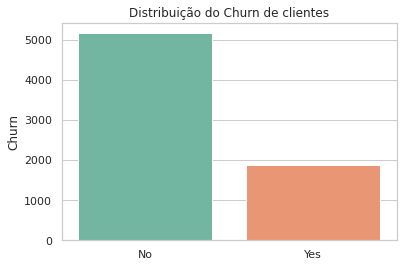

In [20]:
plot = sns.barplot(x=dados['Churn'].unique(), y=dados['Churn'].value_counts(), orient='v');
plot.set_title('Distribuição do Churn de clientes');
plot.grid(True, axis='y');

### Visualizações com relação ao **Churn**

O Churn indica se o cliente deixou ou não a empresa.

Iremos analisar primeiro os dados com base nos **4 grupos** observados na semana 1 de entendimento dos dados:

#### **Informações pessoais sobre o usuário e meses de contrato**

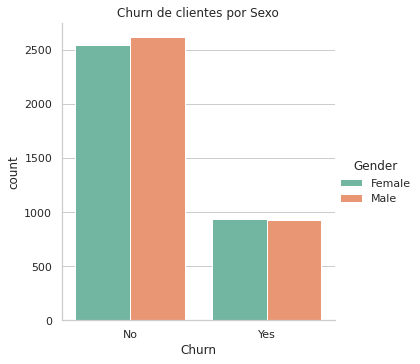

In [21]:
plot = sns.catplot(data=dados, kind='count', x='Churn', hue='Gender');
plt.title('Churn de clientes por Sexo');
plt.show()

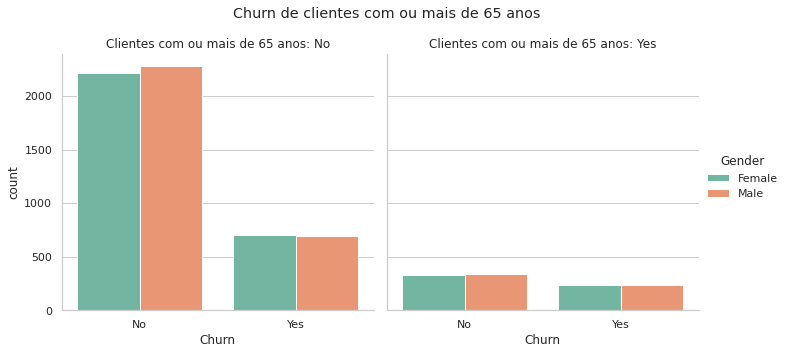

In [69]:
plot = sns.catplot(data=dados, kind='count', x='Churn', hue='Gender', col='SeniorCitizen');
plot.set_titles('Clientes com ou mais de 65 anos: {col_name}');
plot.fig.subplots_adjust(top=.85);
plot.fig.suptitle('Churn de clientes com ou mais de 65 anos');

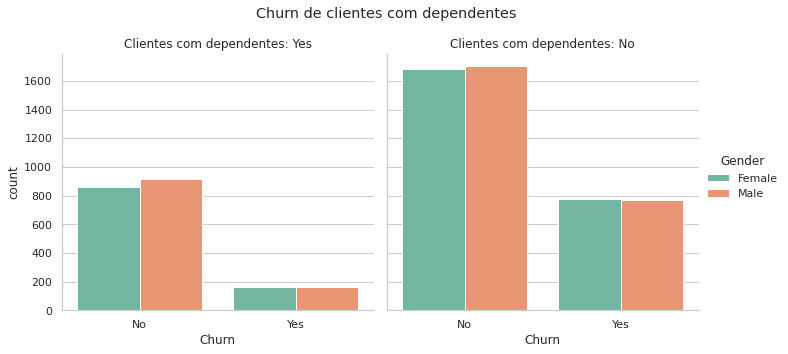

In [68]:
plot = sns.catplot(data=dados, kind='count', x='Churn', hue='Gender', col='Dependents');
plot.set_titles('Clientes com dependentes: {col_name}');
plot.fig.subplots_adjust(top=.85);
plot.fig.suptitle('Churn de clientes com dependentes');

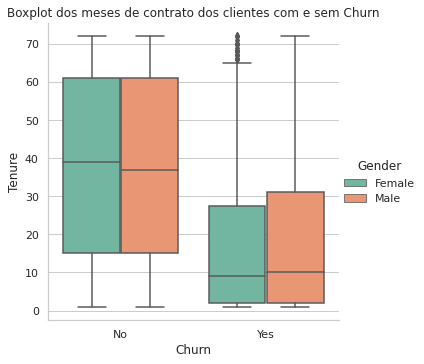

In [65]:
plot = sns.catplot(data=dados, kind='box', x='Churn', y='Tenure', hue='Gender');
plot.set(title='Boxplot dos meses de contrato dos clientes com e sem Churn');

Com as primeiras análises, podemos perceber que:

- **Não há muita diferença em relação ao sexo para definir se um usuário irá cancelar o plano**;

- **Clientes com menos de 65 anos tendem a ter uma taxa maior de Churn com relação aos clientes mais velhos**;

- **Clientes sem dependentes possuem uma taxa de Churn 4x maior do que clientes sem dependentes, aproximadamente**;

- **O churn ocorre com mais frequência em clientes com pouco tempo de plano, em torno de 10 meses de contrato**.

#### **Informações do cliente sobre assinatura do serviço telefônico**

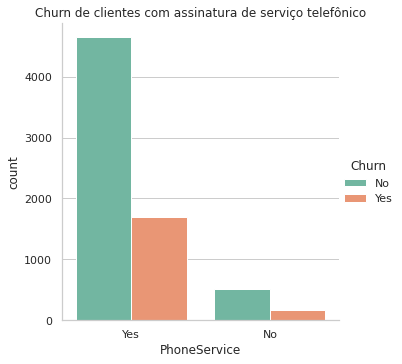

In [64]:
plot = sns.catplot(data=dados, kind='count', x='PhoneService', hue='Churn');
plot.set(title='Churn de clientes com assinatura de serviço telefônico');

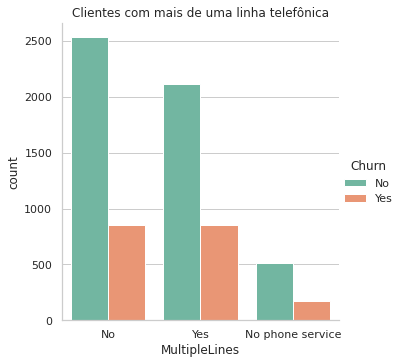

In [26]:
plot = sns.catplot(data=dados, kind='count', x='MultipleLines', hue='Churn');
plt.title('Churn de clientes com mais de uma linha telefônica');
plt.show()

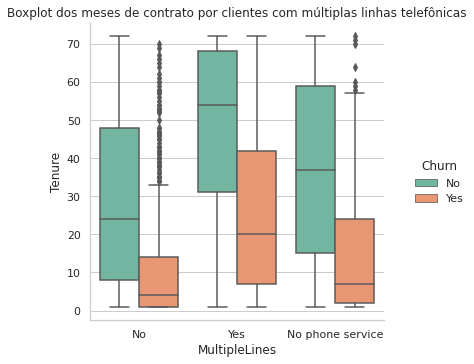

In [63]:
plot = sns.catplot(data=dados, kind='box', x='MultipleLines', y='Tenure', hue='Churn');
plot.set(title='Boxplot dos meses de contrato por clientes com múltiplas linhas telefônicas');

Com as análises acima, podemos perceber que:

- **A quantidade de clientes que cancelam o plano é praticamente igual para os clientes com uma ou mais linha telefônica**;

- **Clientes com mais de uma linha telefônica ficam com o contrato ativo por mais tempo, antes de cancelarem o plano**.

#### **Informações do cliente sobre serviços na assinatura de internet**

In [105]:
# Função para ver a porcentagem dos clientes
def porcentagem(plot, dados):
  total = float(len(dados))
  for p in plot.ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    plot.ax.annotate(percentage, (x, y),ha='center')

  return plot

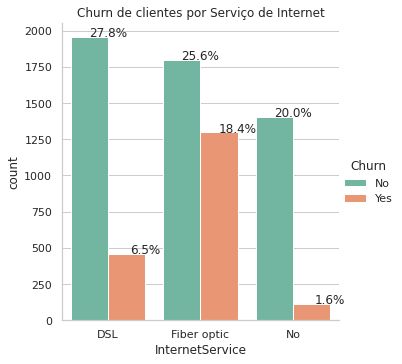

In [106]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn');
plot.set(title='Churn de clientes por Serviço de Internet');

plot = porcentagem(plot, dados)

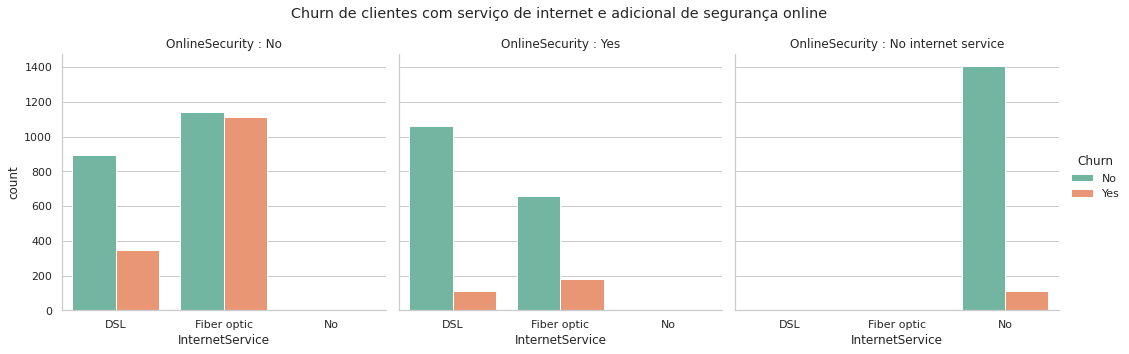

In [109]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='OnlineSecurity');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com serviço de internet e adicional de segurança online');

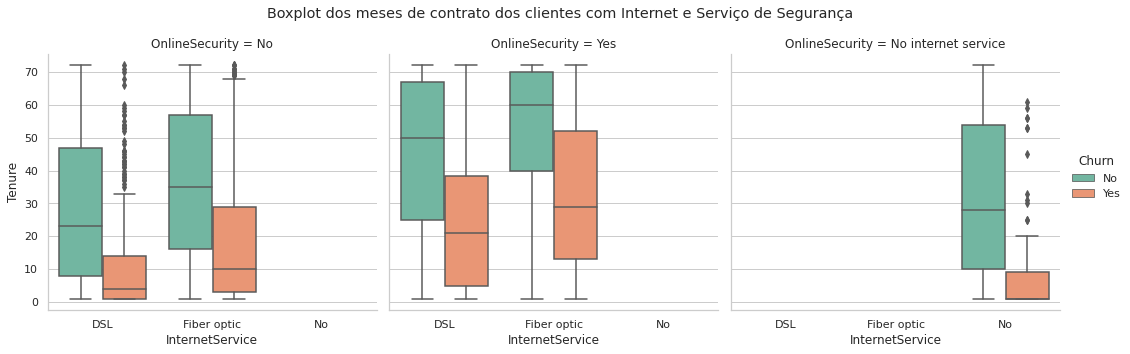

In [60]:
plot = sns.catplot(data=dados, kind='box', x='InternetService', y='Tenure', hue='Churn', col='OnlineSecurity');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Boxplot dos meses de contrato dos clientes com Internet e Serviço de Segurança');

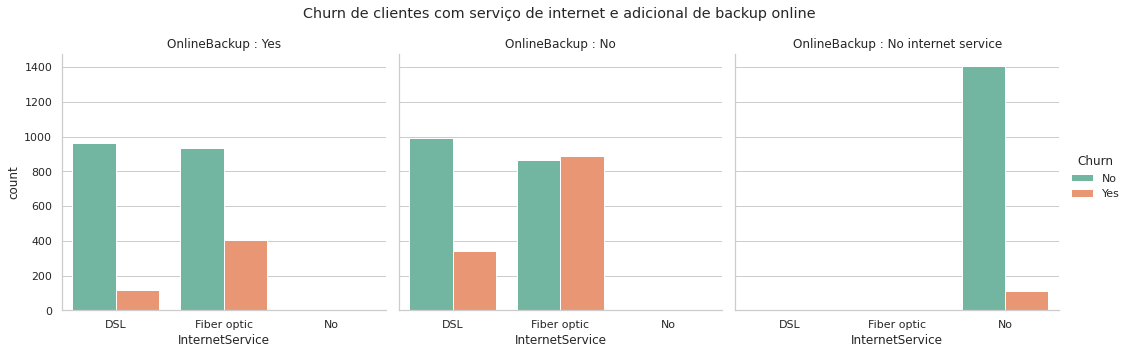

In [77]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='OnlineBackup');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com serviço de internet e adicional de backup online');

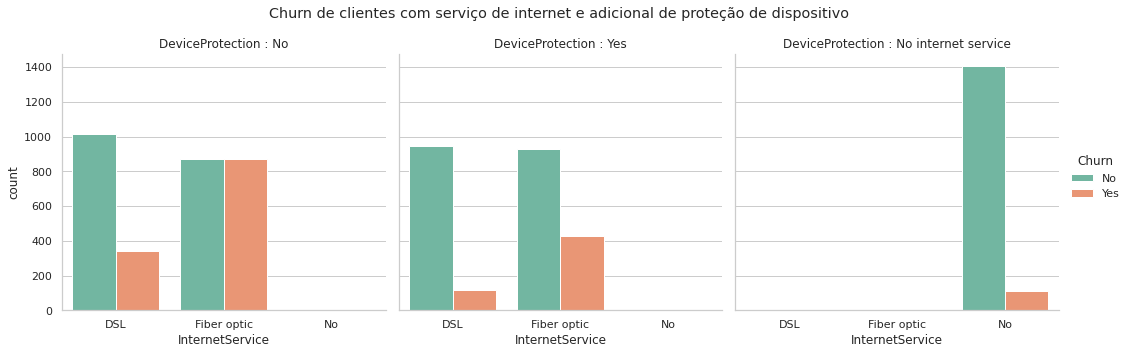

In [78]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='DeviceProtection');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com serviço de internet e adicional de proteção de dispositivo');

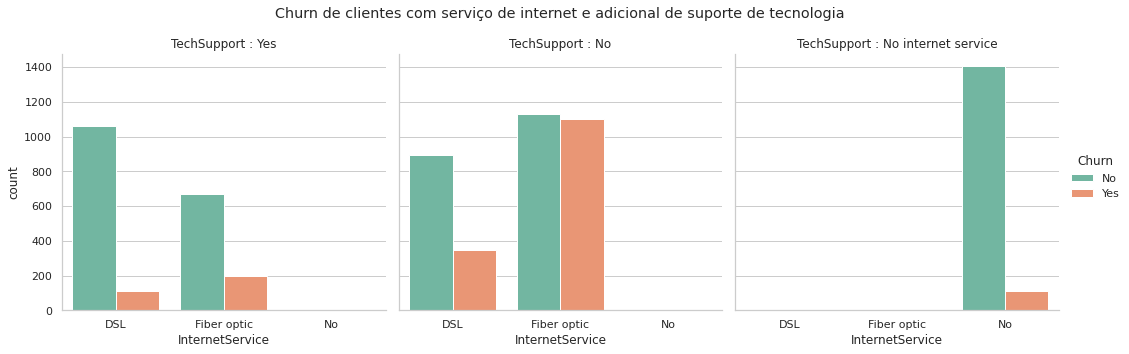

In [79]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='TechSupport');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com serviço de internet e adicional de suporte de tecnologia');

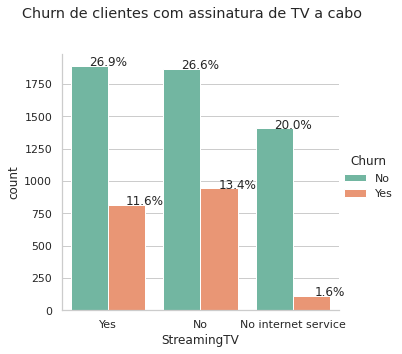

In [111]:
plot = sns.catplot(data=dados, kind='count', x='StreamingTV', hue='Churn');
#plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com assinatura de TV a cabo');
plot = porcentagem(plot, dados)

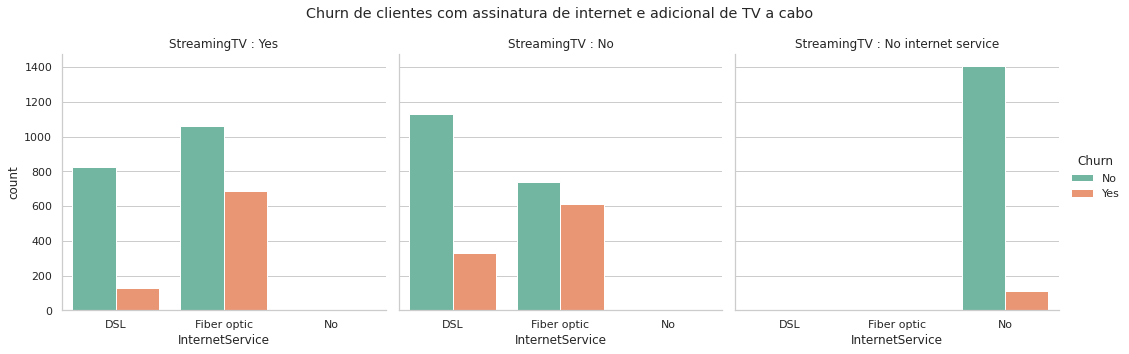

In [85]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='StreamingTV');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com assinatura de internet e adicional de TV a cabo');

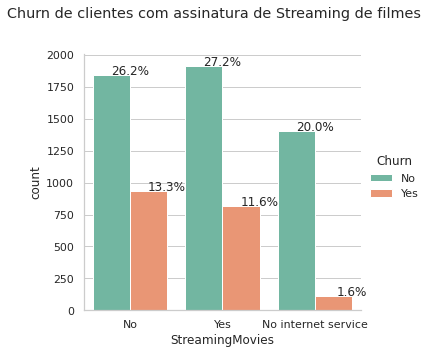

In [112]:
plot = sns.catplot(data=dados, kind='count', x='StreamingMovies', hue='Churn');
#plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com assinatura de Streaming de filmes');
plot = porcentagem(plot, dados)

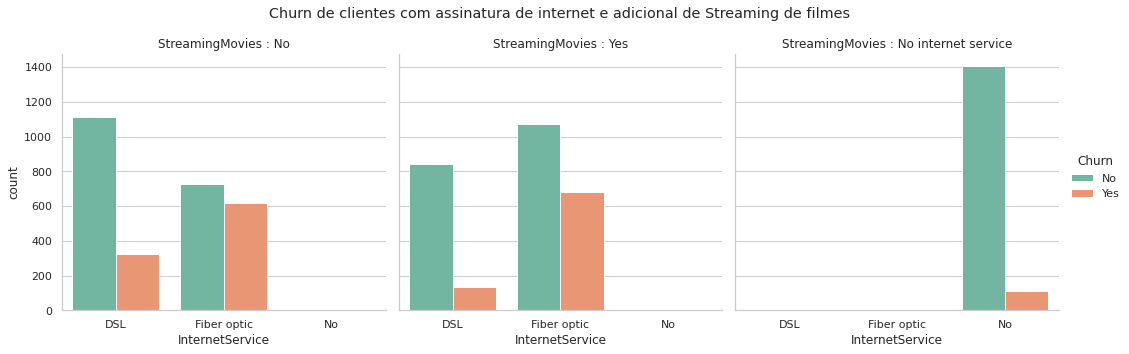

In [90]:
plot = sns.catplot(data=dados, kind='count', x='InternetService', hue='Churn', col='StreamingMovies');
plot.set_titles('{col_var} : {col_name}');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Churn de clientes com assinatura de internet e adicional de Streaming de filmes');

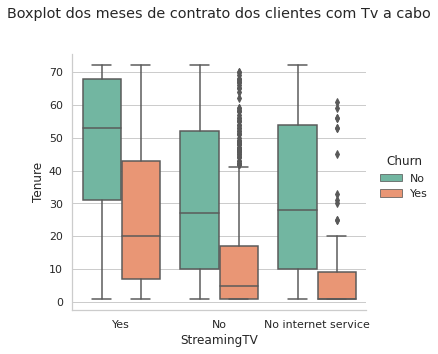

In [113]:
plot = sns.catplot(data=dados, kind='box', x='StreamingTV', y='Tenure', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Boxplot dos meses de contrato dos clientes com Tv a cabo');

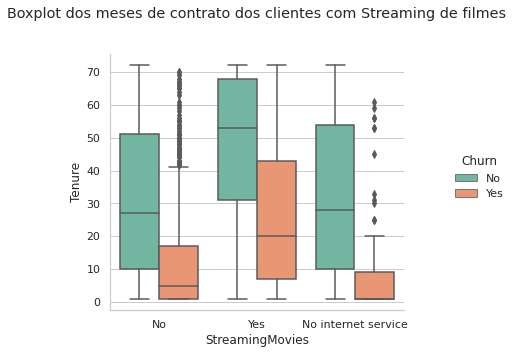

In [114]:
plot = sns.catplot(data=dados, kind='box', x='StreamingMovies', y='Tenure', hue='Churn');
plot.fig.subplots_adjust(top=.85)
plot.fig.suptitle('Boxplot dos meses de contrato dos clientes com Streaming de filmes');

Com as análises acima, podemos perceber que:

- **Os clientes com serviço de fibra óptica tendem a cancelar mais o plano com a operadora**;

- **A maioria dos clientes não possuem serviços adicionais de segurança e suporte. Entre os clientes que possuem esses serviços a taxa de Churn é menor**;

- **Cliente com serviços de streaming tendem a ter uma taxa de churn menor e ficam mais tempo com o plano ativo se comparado com os clientes que não possuem serviço de streaming**;

#### **Informações do cliente sobre o contrato do usuário e gastos**

In [115]:
# Em edição...